In [1]:
import pandas as pd
import json
import numpy as np
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)


df = pd.read_csv('parking.csv')

df.head()

Modele   Marque         Date  Location      Prix Carburant  \
0        Serie 5      Bmw   21.01.2022   POLOGNE   4 017 €         -   
1        Serie 3      Bmw   24.05.2023   POLOGNE   8 976 €    DIESEL   
2  Genesis coupe  Hyundai   07.10.2023   POLOGNE  12 678 €   ESSENCE   
3          Corsa     Opel   25.10.2023   POLOGNE   5 386 €   ESSENCE   
4        Outback   Subaru   26.10.2023   POLOGNE  32 000 €   ESSENCE   

  Kilométrage  Année Boîte de vitesse Departements  
0  266 000 KM   2001                -       16-515  
1  385 000 KM   2014      AUTOMATIQUE       16-515  
2  138 000 KM   2013      AUTOMATIQUE       16-515  
3  100 907 KM   2014         MANUELLE       16-515  
4    8 000 KM   2022      AUTOMATIQUE       16-515

In [2]:

# Conversion de la colonne 'Date' en type datetime
df['Date'] = pd.to_datetime(df['Date'].str.strip(), format='%d.%m.%Y')



# Nettoyage de la colonne 'Prix' en supprimant le symbole '€', la virgule, et les espaces
df['Prix'] = pd.to_numeric(df['Prix'].str.strip().replace('[^\d.]', '', regex=True))

# Nettoyage de la colonne 'Kilométrage' en supprimant 'KM', les espaces, la virgule, et convertir en numérique
df['Kilométrage'] = pd.to_numeric(df['Kilométrage'].str.strip().replace('[^\d.]', '', regex=True))

# Nettoyage de la colonne 'Carburant' en mettant en majuscules et en remplaçant '-' par NaN
df['Carburant'] = df['Carburant'].str.upper().replace('-', pd.NA)

# Nettoyage de la colonne 'Boîte de vitesse' en mettant en majuscules et en remplaçant '-' par NaN
df['Boîte de vitesse'] = df['Boîte de vitesse'].str.upper().replace('-', pd.NA)

# Nettoyage de la colonne 'Carburant' en mettant en majuscules et en remplaçant '-' par NaN
df['Carburant'] = df['Carburant'].str.upper()
df['Carburant'] = df['Carburant'].mask(df['Carburant'] == '-', pd.NA)
df['Carburant'] = df['Carburant'].mask(df['Carburant'] == '', pd.NA)

# Nettoyage de la colonne 'Boîte de vitesse' en mettant en majuscules et en remplaçant '-' par NaN
df['Boîte de vitesse'] = df['Boîte de vitesse'].str.upper().mask(df['Boîte de vitesse'] == '-', pd.NA)




# Affichage du DataFrame après la conversion
print(df)

             Modele    Marque       Date    Location     Prix Carburant  \
0           Serie 5       Bmw 2022-01-21     POLOGNE   4017.0      <NA>   
1           Serie 3       Bmw 2023-05-24     POLOGNE   8976.0    DIESEL   
2     Genesis coupe   Hyundai 2023-10-07     POLOGNE  12678.0   ESSENCE   
3             Corsa      Opel 2023-10-25     POLOGNE   5386.0   ESSENCE   
4           Outback    Subaru 2023-10-26     POLOGNE  32000.0   ESSENCE   
...             ...       ...        ...         ...      ...       ...   
6349         206 cc   Peugeot 2023-08-14   ALLEMAGNE   2499.0       NaN   
6350     C4 picasso   Citroen 2023-08-27   ALLEMAGNE   8999.0       NaN   
6351       Classe e  Mercedes 2023-09-07   ALLEMAGNE  69950.0       NaN   
6352          Enyaq     Skoda 2023-09-17   ALLEMAGNE  42000.0       NaN   
6353         Meriva      Opel 2023-09-19   ALLEMAGNE   4000.0       NaN   

      Kilométrage  Année Boîte de vitesse Departements  
0        266000.0   2001             <NA> 

In [3]:


# Convert 'Année' column to integer
df['Année'] = pd.to_numeric(df['Année'], errors='coerce')

# Affichage du DataFrame après la conversion
print(df)


             Modele    Marque       Date    Location     Prix Carburant  \
0           Serie 5       Bmw 2022-01-21     POLOGNE   4017.0      <NA>   
1           Serie 3       Bmw 2023-05-24     POLOGNE   8976.0    DIESEL   
2     Genesis coupe   Hyundai 2023-10-07     POLOGNE  12678.0   ESSENCE   
3             Corsa      Opel 2023-10-25     POLOGNE   5386.0   ESSENCE   
4           Outback    Subaru 2023-10-26     POLOGNE  32000.0   ESSENCE   
...             ...       ...        ...         ...      ...       ...   
6349         206 cc   Peugeot 2023-08-14   ALLEMAGNE   2499.0       NaN   
6350     C4 picasso   Citroen 2023-08-27   ALLEMAGNE   8999.0       NaN   
6351       Classe e  Mercedes 2023-09-07   ALLEMAGNE  69950.0       NaN   
6352          Enyaq     Skoda 2023-09-17   ALLEMAGNE  42000.0       NaN   
6353         Meriva      Opel 2023-09-19   ALLEMAGNE   4000.0       NaN   

      Kilométrage  Année Boîte de vitesse Departements  
0        266000.0   2001             <NA> 

In [4]:
# Capitalize the first letter of each word in the 'Location' column
df['Location'] = df['Location'].str.title()

# Display the modified DataFrame
print(df)

             Modele    Marque       Date    Location     Prix Carburant  \
0           Serie 5       Bmw 2022-01-21     Pologne   4017.0      <NA>   
1           Serie 3       Bmw 2023-05-24     Pologne   8976.0    DIESEL   
2     Genesis coupe   Hyundai 2023-10-07     Pologne  12678.0   ESSENCE   
3             Corsa      Opel 2023-10-25     Pologne   5386.0   ESSENCE   
4           Outback    Subaru 2023-10-26     Pologne  32000.0   ESSENCE   
...             ...       ...        ...         ...      ...       ...   
6349         206 cc   Peugeot 2023-08-14   Allemagne   2499.0       NaN   
6350     C4 picasso   Citroen 2023-08-27   Allemagne   8999.0       NaN   
6351       Classe e  Mercedes 2023-09-07   Allemagne  69950.0       NaN   
6352          Enyaq     Skoda 2023-09-17   Allemagne  42000.0       NaN   
6353         Meriva      Opel 2023-09-19   Allemagne   4000.0       NaN   

      Kilométrage  Année Boîte de vitesse Departements  
0        266000.0   2001             <NA> 

In [5]:
# Manually specify latitude and longitude for each country
coordinates = {
    ' Allemagne': {'Latitude': 51.1657, 'Longitude': 10.4515},
    ' Espagne': {'Latitude': 40.4637, 'Longitude': -3.7492},
    ' France': {'Latitude': 46.6035, 'Longitude': 1.8883},
    ' Italie': {'Latitude': 41.8719, 'Longitude': 12.5674},
    ' Pays-Bas': {'Latitude': 52.3676, 'Longitude': 4.9041},
    ' Pologne': {'Latitude': 51.9194, 'Longitude': 19.1451},
}

# Add Latitude and Longitude columns based on the 'Location' column
df['Latitude'] = df['Location'].map(lambda loc: coordinates[loc]['Latitude'])
df['Longitude'] = df['Location'].map(lambda loc: coordinates[loc]['Longitude'])

# Print the updated DataFrame
print(df)

             Modele    Marque       Date    Location     Prix Carburant  \
0           Serie 5       Bmw 2022-01-21     Pologne   4017.0      <NA>   
1           Serie 3       Bmw 2023-05-24     Pologne   8976.0    DIESEL   
2     Genesis coupe   Hyundai 2023-10-07     Pologne  12678.0   ESSENCE   
3             Corsa      Opel 2023-10-25     Pologne   5386.0   ESSENCE   
4           Outback    Subaru 2023-10-26     Pologne  32000.0   ESSENCE   
...             ...       ...        ...         ...      ...       ...   
6349         206 cc   Peugeot 2023-08-14   Allemagne   2499.0       NaN   
6350     C4 picasso   Citroen 2023-08-27   Allemagne   8999.0       NaN   
6351       Classe e  Mercedes 2023-09-07   Allemagne  69950.0       NaN   
6352          Enyaq     Skoda 2023-09-17   Allemagne  42000.0       NaN   
6353         Meriva      Opel 2023-09-19   Allemagne   4000.0       NaN   

      Kilométrage  Année Boîte de vitesse Departements  Latitude  Longitude  
0        266000.0   2

In [6]:
# Afficher toutes les valeurs uniques de la colonne 'Modele'
unique_modeles = df['Modele'].unique()
print("Valeurs uniques de la colonne 'Modele':")
print(unique_modeles)

# Afficher toutes les valeurs uniques de la colonne 'Marque'
unique_marques = df['Marque'].unique()
print("\nValeurs uniques de la colonne 'Marque':")
print(unique_marques)

Valeurs uniques de la colonne 'Modele':
['Serie 5' 'Serie 3' 'Genesis coupe' 'Corsa' 'Outback' 'Laguna' 'Q7' 'A6'
 'L200' '626' 'Zafira' 'Yaris' 'Avensis break' 'Xsara picasso' 'V8' 'A4'
 'Forester' 'Espace' 'X5' 'Mondeo' 'Xc90' 'Touareg' 'Serie 1' 'Golf'
 'Talisman' 'Mini' 'Kuga' 'Brz' 'Celica' 'Galaxy' 'Discovery'
 'Transporter' 'Cr-v' 'Vivaro' '2' 'Crosstouran' 'Panda' 'Insignia'
 'Passat' 'X3' 'Vito' 'Classe e' 'Classe a' 'Classe clk' 'Santa fe' '3'
 'Premacy' '307' 'Vectra' 'Pathfinder' 'Lancer' 'Astra' 'Outlander'
 'Galant' 'Bora' 'Touran' 'Rav4' 'Corolla' 'Octavia combi' 'Leon' 'Ibiza'
 'Sx4' 'S40' 'Pacifica' 'Mondeo sw' 'Tourneo connect' 'Classe b' 'Tiguan'
 'Q5' 'S-max' 'Venga' 'Focus sw' 'Scenic' 'I30' 'Golf sw' 'X-trail'
 'Civic' 'Aygo' 'Classe c' 'Serie 5 gt' 'Fiesta' 'I20' 'Berlingo' '308'
 'A3' 'I3' 'Fabia' 'Model s' 'Captur' 'Wrangler' 'Land cruiser' 'Octavia'
 'S90' 'Superb' 'Serie 3 touring' 'C5' '126' 'I10' 'Is' 'Coupe' 'Defender'
 'Classe gla' 'Auris' 'Aveo' 'Serie 7

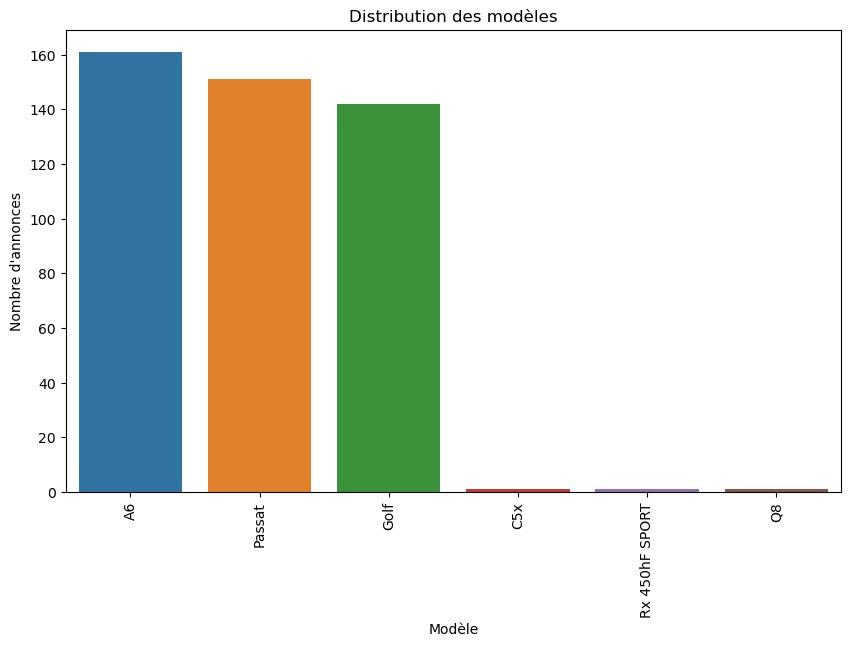

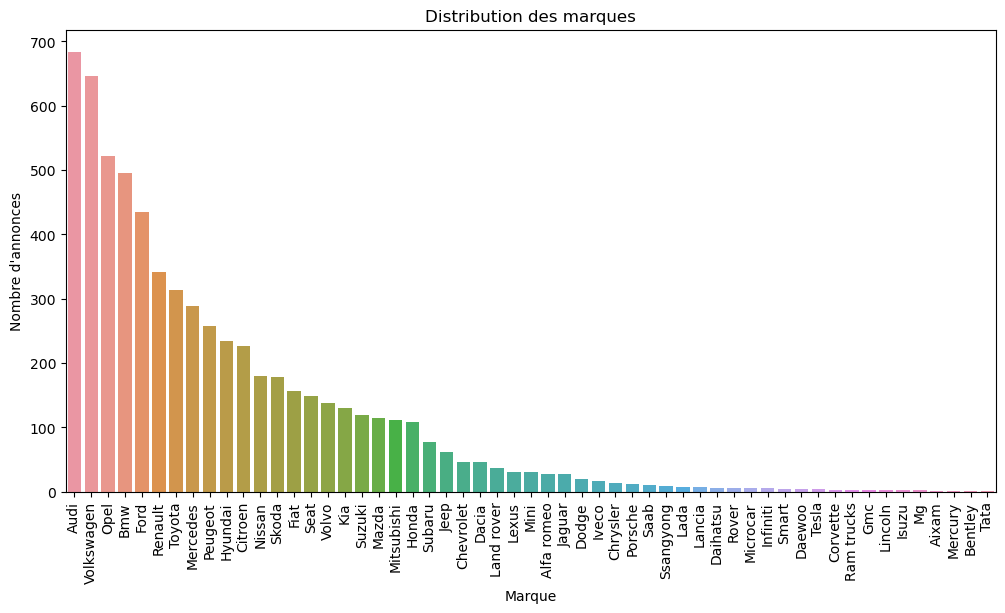

In [7]:
# Obtenir les modèles triés par fréquence
sorted_modeles = df['Modele'].value_counts().index

# Sélectionner les 3 premiers et les 3 derniers modèles
selected_modeles = list(sorted_modeles[:3]) + list(sorted_modeles[-3:])

# Filtrer le DataFrame pour inclure uniquement ces modèles
df_selected_modeles = df[df['Modele'].isin(selected_modeles)]

# Graphique pour la colonne 'Modele'
plt.figure(figsize=(10, 6))
sns.countplot(x='Modele', data=df_selected_modeles, order=selected_modeles)
plt.xticks(rotation=90)
plt.title('Distribution des modèles')
plt.xlabel('Modèle')
plt.ylabel('Nombre d\'annonces')
plt.show()

# Graphique pour la colonne 'Marque'
plt.figure(figsize=(12, 6))
sns.countplot(x='Marque', data=df, order=df['Marque'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution des marques')
plt.xlabel('Marque')
plt.ylabel('Nombre d\'annonces')
plt.show()

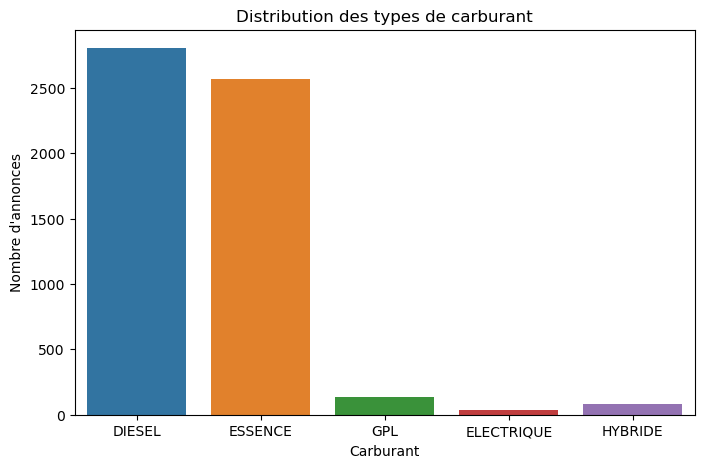

In [8]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Carburant', data=df)
plt.title('Distribution des types de carburant')
plt.xlabel('Carburant')
plt.ylabel('Nombre d\'annonces')
plt.show()


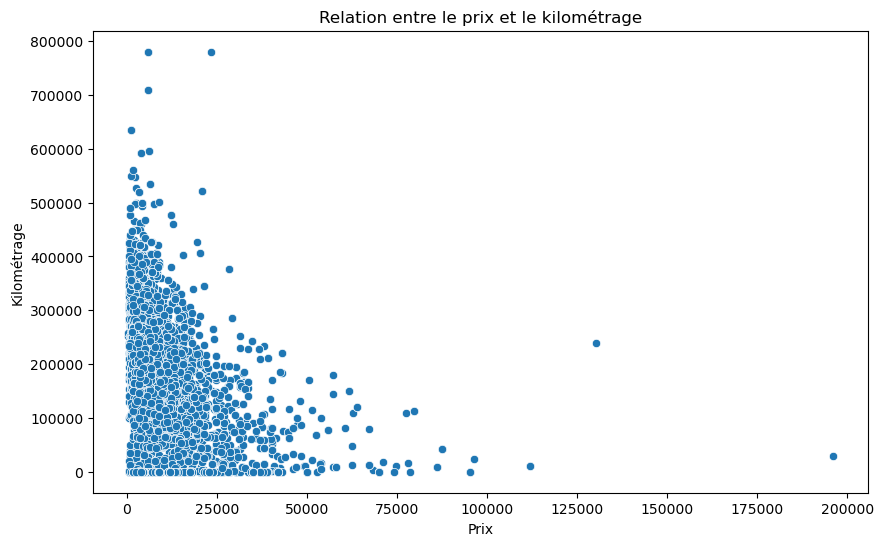

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Prix', y='Kilométrage', data=df)
plt.title('Relation entre le prix et le kilométrage')
plt.xlabel('Prix')
plt.ylabel('Kilométrage')
plt.show()


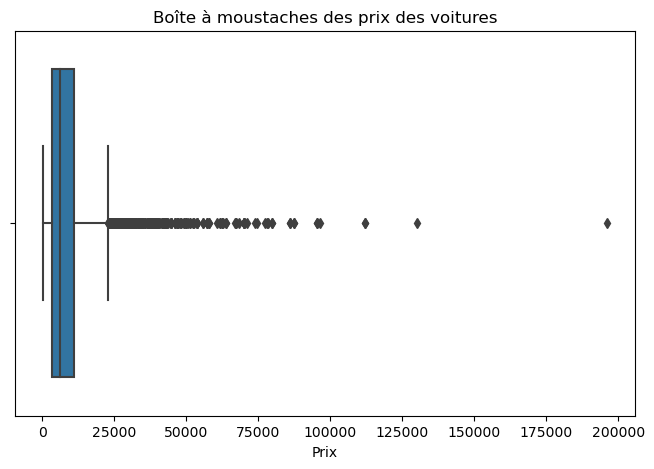

In [10]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Prix', data=df)
plt.title('Boîte à moustaches des prix des voitures')
plt.xlabel('Prix')
plt.show()


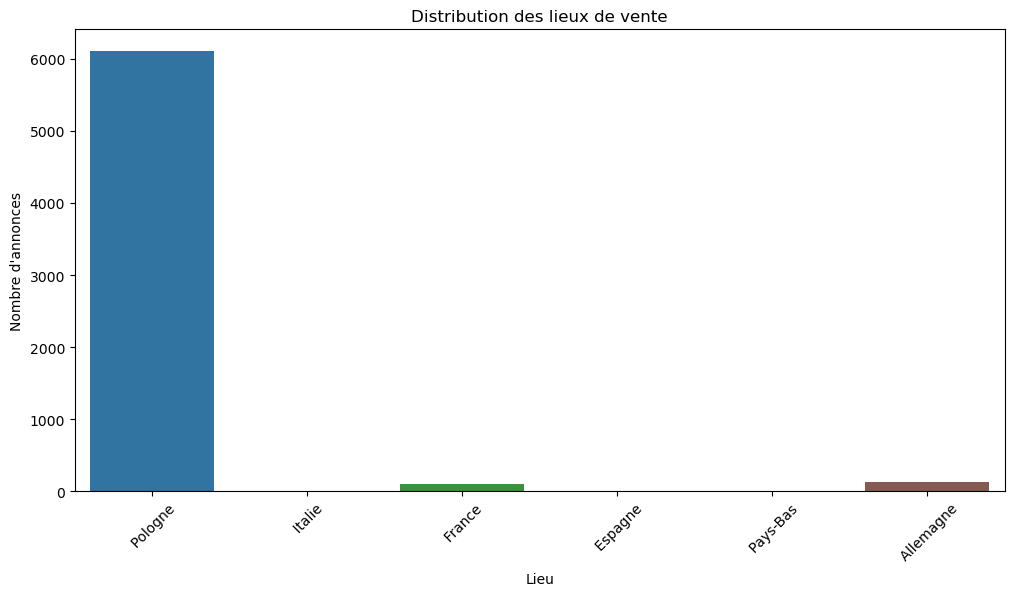

In [11]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Location', data=df)
plt.xticks(rotation=45)
plt.title('Distribution des lieux de vente')
plt.xlabel('Lieu')
plt.ylabel('Nombre d\'annonces')
plt.show()


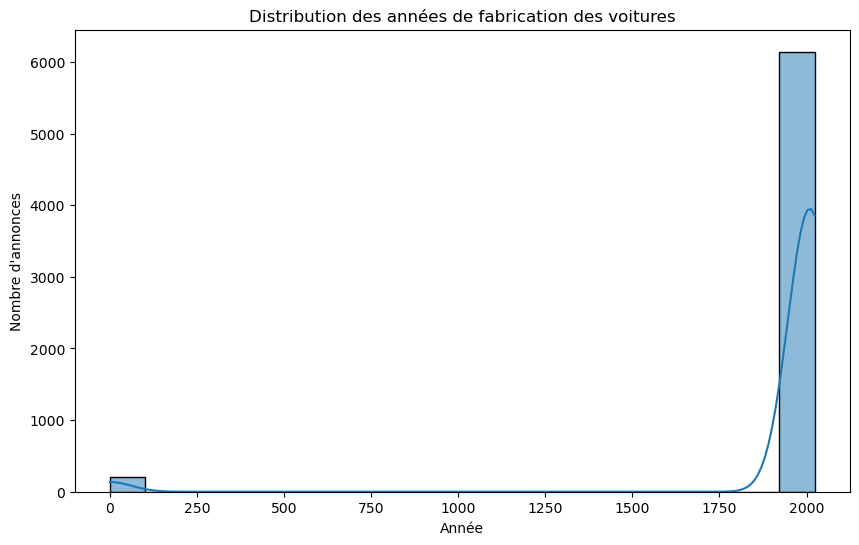

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(x='Année', data=df, bins=20, kde=True)
plt.title('Distribution des années de fabrication des voitures')
plt.xlabel('Année')
plt.ylabel('Nombre d\'annonces')
plt.show()


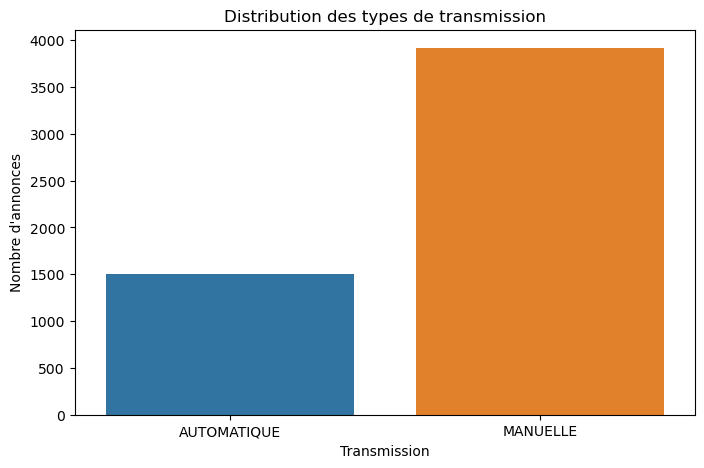

In [13]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Boîte de vitesse', data=df)
plt.title('Distribution des types de transmission')
plt.xlabel('Transmission')
plt.ylabel('Nombre d\'annonces')
plt.show()


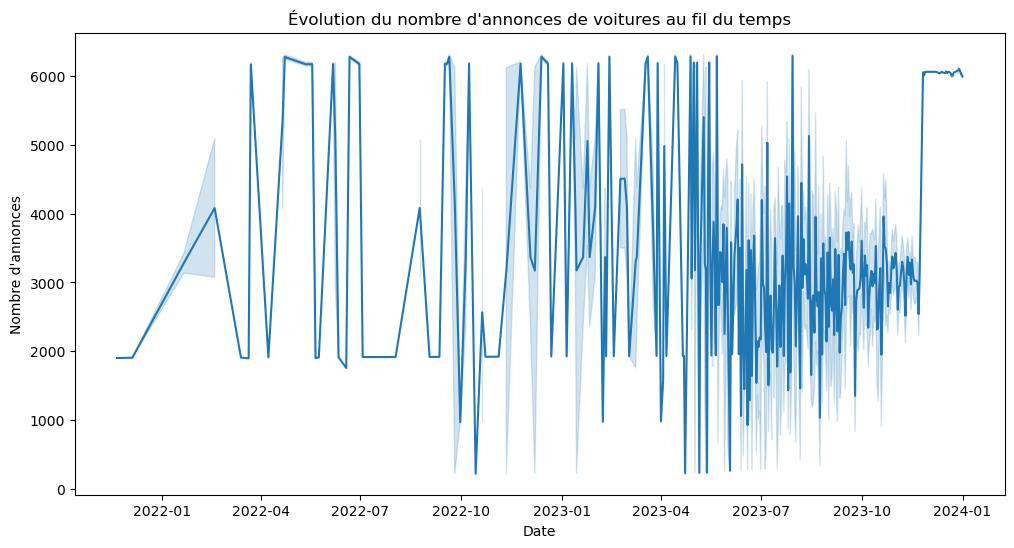

In [14]:
plt.figure(figsize=(12, 6))
df['Date'] = pd.to_datetime(df['Date'])
sns.lineplot(x='Date', y=df.index, data=df)
plt.title('Évolution du nombre d\'annonces de voitures au fil du temps')
plt.xlabel('Date')
plt.ylabel('Nombre d\'annonces')
plt.show()


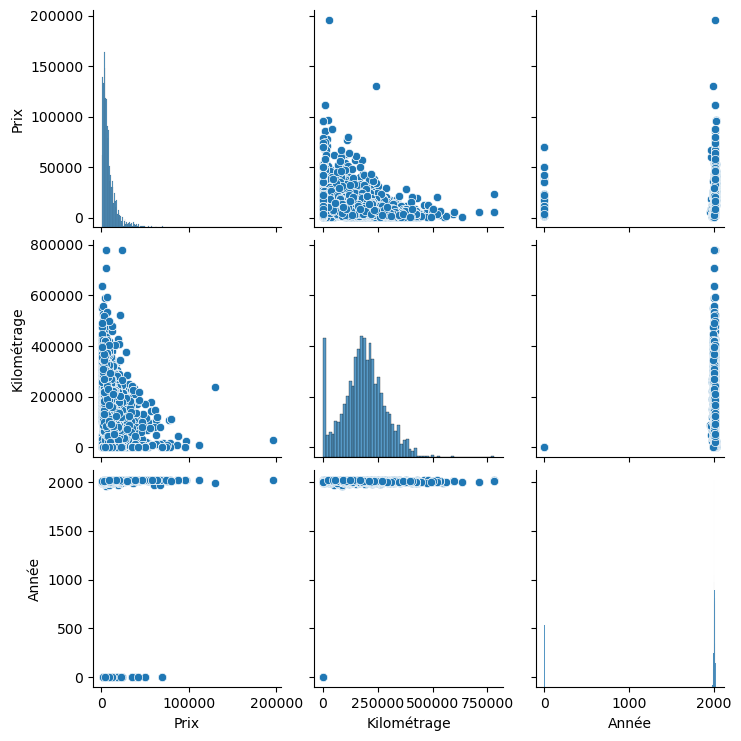

In [15]:
sns.pairplot(df[['Prix', 'Kilométrage', 'Année']])
plt.show()


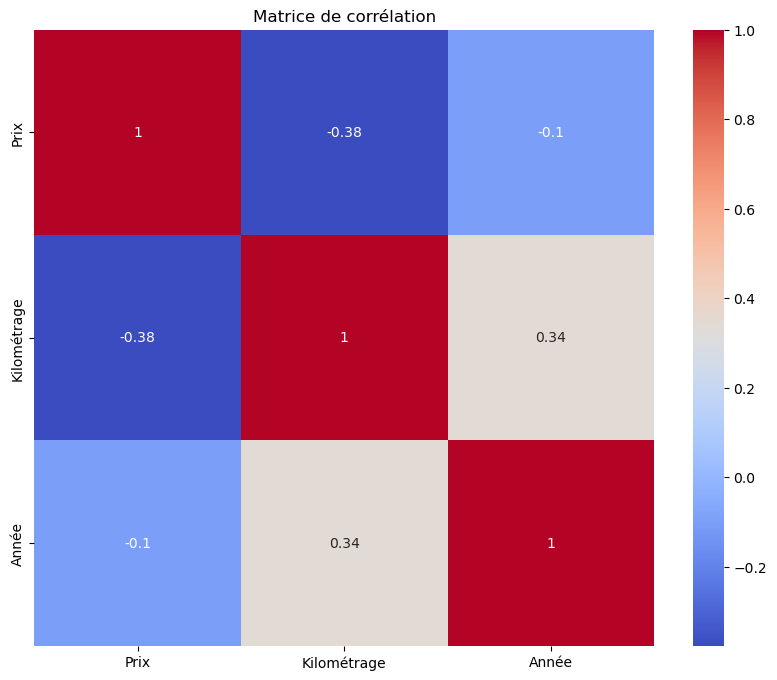

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[['Prix', 'Kilométrage', 'Année']].corr(), annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()


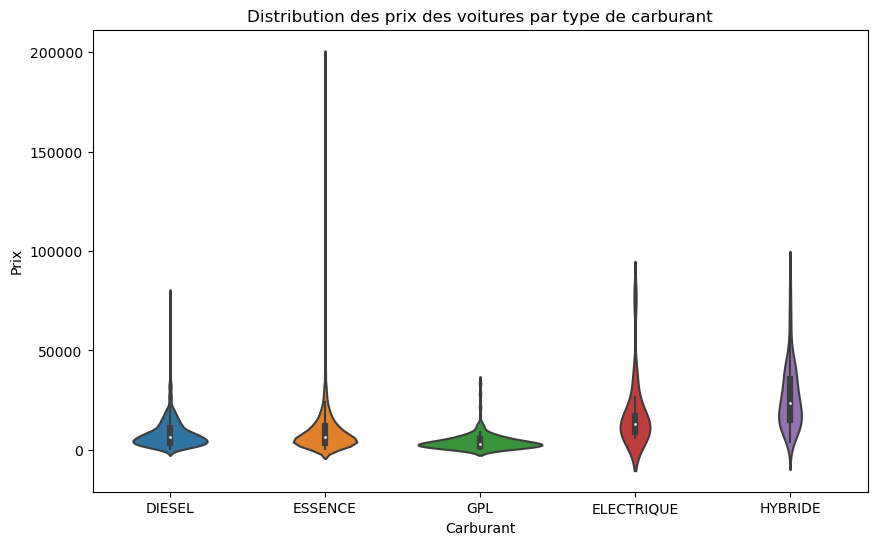

In [17]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Carburant', y='Prix', data=df)
plt.title('Distribution des prix des voitures par type de carburant')
plt.xlabel('Carburant')
plt.ylabel('Prix')
plt.show()


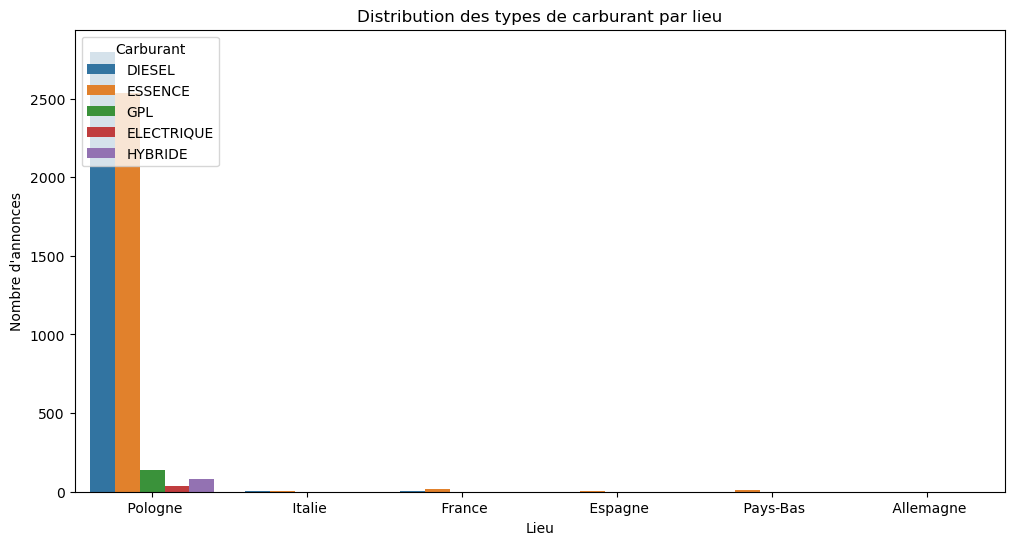

In [18]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Location', hue='Carburant', data=df)
plt.title('Distribution des types de carburant par lieu')
plt.xlabel('Lieu')
plt.ylabel('Nombre d\'annonces')
plt.show()


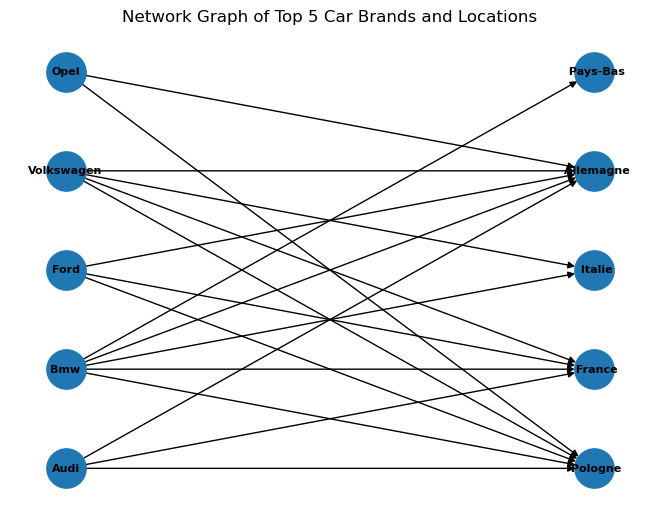

In [19]:
import networkx as nx
import matplotlib.pyplot as plt

# Get the top 5 car brands based on the number of cars sold
top_brands = df['Marque'].value_counts().nlargest(5).index

# Filter the DataFrame to include only the top 5 brands
df_top_brands = df[df['Marque'].isin(top_brands)]

# Create a directed graph
G = nx.DiGraph()

# Add nodes for car brands
G.add_nodes_from(df_top_brands['Marque'], bipartite=0)

# Add nodes for locations
G.add_nodes_from(df_top_brands['Location'], bipartite=1)

# Add edges based on occurrences of brands in locations
brand_location_counts = df_top_brands.groupby(['Marque', 'Location']).size().reset_index(name='count')
for _, row in brand_location_counts.iterrows():
    G.add_edge(row['Marque'], row['Location'], weight=row['count'])

# Draw the network graph
pos = nx.bipartite_layout(G, df_top_brands['Marque'])
nx.draw(G, pos, with_labels=True, font_size=8, node_size=800, font_color='black', font_weight='bold')

# Display the graph
plt.title('Network Graph of Top 5 Car Brands and Locations')
plt.show()




# pour get attitude
pip install geopy


In [20]:
## Convertir les valeurs de la colonne location pour match avec le json 
# Clean the 'Location' column in the DataFrame
df['Location'] = df['Location'].str.strip()
# Mapping dictionary to match DataFrame locations with GeoJSON locations
location_mapping = {
    'Pologne': 'Poland',
    'Italie': 'Italy',
    'France': 'France',
    'Espagne': 'Spain',
    'Pays-Bas': 'Netherlands',
    'Allemagne': 'Germany'
}

# Clean the 'Location' column in the DataFrame using the mapping
df['Location'] = df['Location'].map(location_mapping)

# Print the unique values in the 'Location' column after cleaning
print(f"Locations in DataFrame: {df['Location'].unique()}")


Locations in DataFrame: ['Poland' 'Italy' 'France' 'Spain' 'Netherlands' 'Germany']


In [21]:
# Group by location (country in this case) and calculate the mean price
mean_price_by_location = df.groupby('Location')['Prix'].mean().reset_index()
print(mean_price_by_location)

      Location          Prix
0       France  16903.253012
1      Germany  13563.040000
2        Italy           NaN
3  Netherlands           NaN
4       Poland   8760.303483
5        Spain           NaN


## Graph Prix Moyen par pays

In [23]:
# Clean the 'Location' column in the DataFrame
df['Location'] = df['Location'].str.strip()
# Mapping dictionary to match DataFrame locations with GeoJSON locations
location_mapping = {
    'Pologne': 'Poland',
    'Italie': 'Italy',
    'France': 'France',
    'Espagne': 'Spain',
    'Pays-Bas': 'Netherlands',
    'Allemagne': 'Germany'
}

# Clean the 'Location' column in the DataFrame using the mapping
df['Location'] = df['Location'].map(location_mapping)

# Print the unique values in the 'Location' column after cleaning
print(f"Locations in DataFrame: {df['Location'].unique()}")




Locations in DataFrame: [nan 'France']


In [28]:
# Check if Location values are present in the GeoJSON file
with open('europe-countries.json', 'r', encoding='utf-8') as file:
    europe_geojson = json.load(file)

geojson_features = [feature['properties']['name'] for feature in europe_geojson['features']]
missing_locations = set(df['Location']) - set(geojson_features)

if missing_locations:
    print(f"Warning: The following locations are missing in the GeoJSON file: {missing_locations}")

# Print debug information
print(f"Locations in DataFrame: {df['Location'].unique()}")
print(f"Locations in GeoJSON: {geojson_features}")


UnicodeDecodeError: 'charmap' codec can't decode byte 0x81 in position 2058: character maps to <undefined>

In [22]:
import plotly.express as px
import json

# Group by location (country) and calculate the mean price
mean_price_by_location = df.groupby('Location')['Prix'].mean().reset_index()

# Check if Location values are present in the GeoJSON file
geojson_features = [feature['properties']['name'] for feature in europe_geojson['features']]
missing_locations = set(mean_price_by_location['Location']) - set(geojson_features)

if missing_locations:
    print(f"Warning: The following locations are missing in the GeoJSON file: {missing_locations}")

# Create a choropleth map using the mean price data
fig = px.choropleth(
    mean_price_by_location,
    geojson=europe_geojson,
    locations='Location',
    featureidkey='properties.name',
    color='Prix',
    color_continuous_scale='Reds',  # Set to the color scale you prefer
    hover_data=['Location', 'Prix'],
    title='Mean Car Price in Europe'
)

# Update layout for better visualization
fig.update_geos(
    projection_scale=6,
    center=dict(lat=df['Latitude'].mean(), lon=df['Longitude'].mean()),  # Fix the syntax error here
    visible=False
)

# Save the map
fig.write_html('car_price_choropleth_map_plotly.html')


NameError: name 'europe_geojson' is not defined

## Evolution du prix de la voiture la plus présente

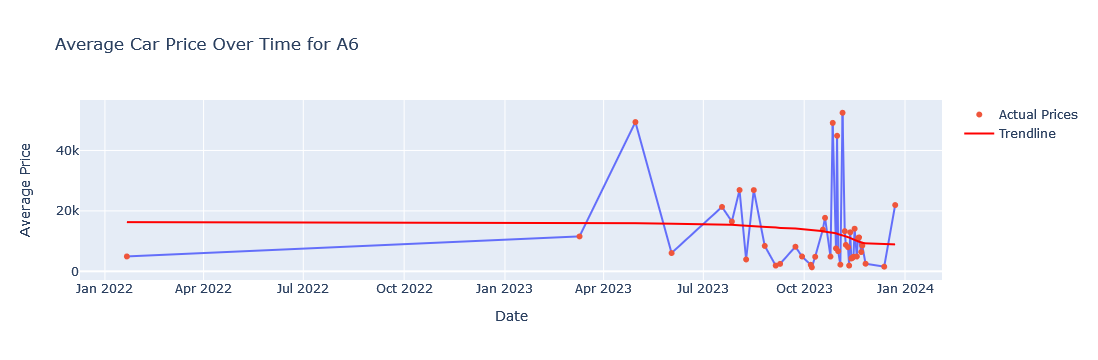

In [25]:
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

# Find the most present car model
most_present_model = df['Modele'].value_counts().idxmax()

# Filter the DataFrame for the most present car model
df_most_present_model = df[df['Modele'] == most_present_model]

# Group by date and calculate the mean price
mean_price_by_date = df_most_present_model.groupby('Date')['Prix'].mean().reset_index()

# Create line chart for the average price at each date
fig_avg_price_by_date = px.line(
    mean_price_by_date,
    x='Date',
    y='Prix',
    labels={'Prix': 'Average Price', 'Date': 'Date'},
    title=f'Average Car Price Over Time for {most_present_model}'
)

# Perform linear regression
coefficients = np.polyfit(mean_price_by_date.index, mean_price_by_date['Prix'], 1)
trendline = np.poly1d(coefficients)

# Add the scatter plot
fig_avg_price_by_date.add_trace(go.Scatter(
    x=mean_price_by_date['Date'],
    y=mean_price_by_date['Prix'],
    mode='markers',
    name='Actual Prices'
))

# Add the trendline
fig_avg_price_by_date.add_trace(go.Scatter(
    x=mean_price_by_date['Date'],
    y=trendline(mean_price_by_date.index),
    mode='lines',
    name='Trendline',
    line=dict(color='red', width=2),
))

# Show the plot
fig_avg_price_by_date.show()


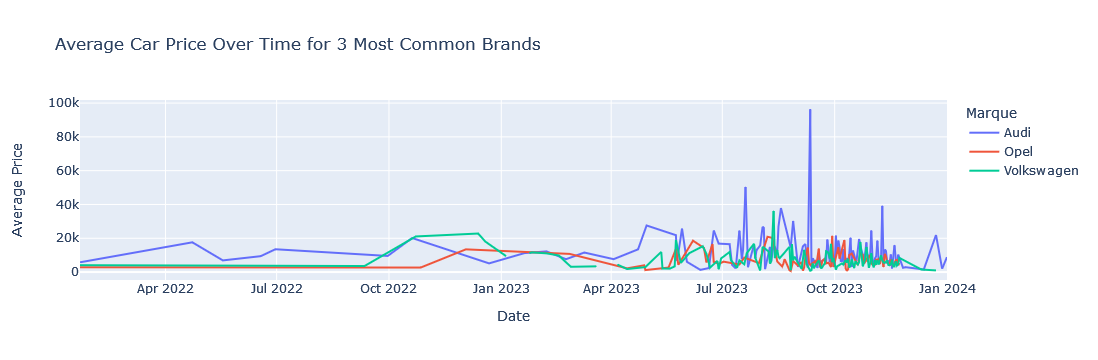

In [26]:
import plotly.express as px
import pandas as pd

# Find the 3 most and least common car brands
top3_most_common_brands = df['Marque'].value_counts().nlargest(3).index


# Filter the DataFrame for the 3 most common car brands
df_top3_most_common = df[df['Marque'].isin(top3_most_common_brands)]



# Group by date and calculate the mean price for the 3 most common brands
mean_price_by_date_top3_most_common = df_top3_most_common.groupby(['Date', 'Marque'])['Prix'].mean().reset_index()


# Create line charts for the 3 most and least common car brands
fig_top3_most_common = px.line(
    mean_price_by_date_top3_most_common,
    x='Date',
    y='Prix',
    color='Marque',
    labels={'Prix': 'Average Price', 'Date': 'Date'},
    title='Average Car Price Over Time for 3 Most Common Brands'
)



# Show the plots
fig_top3_most_common.show()



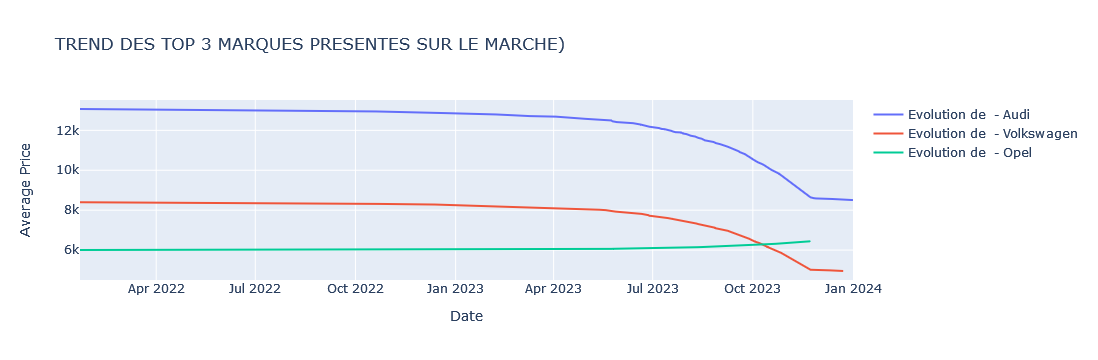

In [27]:
import plotly.graph_objects as go
import numpy as np
import statsmodels.api as sm

# Find the 3 most common car brands
top3_most_common_brands = df['Marque'].value_counts().nlargest(3).index

# Filter the DataFrame for the 3 most common car brands
df_top3_most_common = df[df['Marque'].isin(top3_most_common_brands)]

# Drop rows with missing or infinite values in 'Prix'
df_top3_most_common = df_top3_most_common.dropna(subset=['Prix'])
df_top3_most_common = df_top3_most_common.replace([np.inf, -np.inf], np.nan).dropna(subset=['Prix'])

# Group by date and calculate the mean price for the 3 most common brands
mean_price_by_date_top3_most_common = df_top3_most_common.groupby(['Date', 'Marque'])['Prix'].mean().reset_index()

# Create an empty figure
fig_avg_price_by_date_top3_most_common = go.Figure()

# Perform robust linear regression for each brand
for marque in top3_most_common_brands:
    df_marque = mean_price_by_date_top3_most_common[mean_price_by_date_top3_most_common['Marque'] == marque]

    # Drop rows with missing or infinite values in 'Prix'
    df_marque = df_marque.dropna(subset=['Prix'])
    df_marque = df_marque.replace([np.inf, -np.inf], np.nan).dropna(subset=['Prix'])

    # Fit a robust linear regression model
    X = sm.add_constant(df_marque.index)
    y = df_marque['Prix']
    model = sm.RLM(y, X).fit()

    # Add the trendline
    fig_avg_price_by_date_top3_most_common.add_trace(go.Scatter(
        x=df_marque['Date'],
        y=model.predict(X),
        mode='lines',
        name=f'Evolution de  - {marque}',
        line=dict(width=2),
    ))

# Update layout
fig_avg_price_by_date_top3_most_common.update_layout(
    title='TREND DES TOP 3 MARQUES PRESENTES SUR LE MARCHE)',
    xaxis_title='Date',
    yaxis_title='Average Price'
)

# Show the plot
fig_avg_price_by_date_top3_most_common.show()
